In [2]:
# Download the dataset:
import platform
mysystem = platform.system()
file_id = '10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry'
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
# Check if system is Windows
if mysystem != 'Windows':
    !wget -O dataset.csv --no-check-certificate "$file_download_link"
    # !unzip data.zip

print('Please download the data using the following link:', file_download_link)

--2022-12-05 22:36:46--  https://docs.google.com/uc?export=download&id=10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry
Resolving docs.google.com (docs.google.com)... 74.125.20.102, 74.125.20.138, 74.125.20.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nv8c0812mgan1sar27b75ksofj0vpute/1670279775000/16176821467984544774/*/10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry?e=download&uuid=f2d6203d-1b9a-4797-b9bb-47a01494cc67 [following]
--2022-12-05 22:36:48--  https://doc-04-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nv8c0812mgan1sar27b75ksofj0vpute/1670279775000/16176821467984544774/*/10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry?e=download&uuid=f2d6203d-1b9a-4797-b9bb-47a01494cc67
Resolving doc-04-50-docs.googleusercontent.com (doc-04-50-docs.googleusercontent.com)... 74.125.135.132, 2607:f8b0:400e

In [3]:
#For Our Group's Convenience: Mount Google Drive to access the dataset from there instead
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#Libraries
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn import svm

In [2]:
#Read in dataset
df = pd.read_csv('dataset.csv')
# df = df.sample(n= 80000, random_state=21)
# display(df[df['popularity'] > 75])

#Remove unhelpful columns
df_rem = df.drop(columns=['Unnamed: 0', 'track_id', 'track_name'])
df_rem

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
#At first, our goal was to predict popularity over all genres.
#We realized this was a flawed  genre makes too big a difference.
#E.g., 2 songs might be equally popular, but they might be completely different in all other aspects simply because they are in different genres.
#We decided to examine a single genre, and these 2 cells are a remnant of our inital approch.

# label encoding the generes
# df_rem['track_genre'].unique()
# df_rem['track_genre'] = label_encoder.fit_transform(df_rem['track_genre'])
# #spiltting the a row with multiple artists into multiple rows

# df_rem = (df_rem.set_index(['album_name', 'popularity', 'duration_ms', 'danceability', 'energy',
#        'key', 'loudness', 'mode', 'speechiness', 'acousticness',
#        'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
#        'track_genre'])
#    .apply(lambda x: x.str.split(';').explode())
#    .reset_index())

In [4]:
# label encoding the generes
# df_rem['artists'].unique().size
# 6533
# df_rem['artists'] = label_encoder.fit_transform(df_rem['artists'])
# df_rem.shape
# (11023, 17)
# df_rem

In [5]:
#All genres in dataset
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [6]:
#Limit dataset to a single genre
df_rem = df_rem.loc[df_rem['track_genre']=='party']

#Popularity scores found in "party" genre
df['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94], dtype=int64)

In [7]:
display(df_rem)

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
78000,Harris & Ford;2 Engel & Charlie,Layla sitzt dicht im Flieger,2,126133,False,0.702,0.839,6,-3.954,0,0.0744,0.02320,0.000261,0.0932,0.348,112.516,1,party
78001,Die Zipfelbuben;DJ Cashi,Ballermann Party Hits Megamix 2022.2,0,180157,False,0.666,0.942,1,-2.928,1,0.0689,0.03070,0.000000,0.2460,0.832,141.913,4,party
78002,DJ Robin;Schürze,Best Of Karneval,0,185437,False,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.4320,0.388,140.082,4,party
78003,Julian Sommer,Best Of Karneval,1,225882,False,0.607,0.958,8,-1.131,1,0.0866,0.04120,0.000000,0.2590,0.404,136.036,4,party
78004,DJ Ötzi;Marc Pircher,Karneval 2022 100%,0,239053,False,0.635,0.996,7,-3.107,1,0.0690,0.08790,0.000000,0.1580,0.670,130.033,4,party
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78995,Andreas Gabalier,Home Sweet Home,23,294146,False,0.448,0.768,8,-5.951,1,0.1010,0.10300,0.000000,0.1190,0.489,151.014,4,party
78996,Marco Wagner;Dave Brown,House by the Sea,23,204693,False,0.766,0.947,7,-3.878,1,0.0331,0.03480,0.000004,0.3200,0.765,127.951,4,party
78997,Jürgen Drews;Howard Carpendale,Das ultimative Jubiläums-Best-Of,24,200893,False,0.634,0.549,4,-7.192,1,0.0244,0.34900,0.000000,0.1080,0.444,98.004,4,party
78998,Die Draufgänger,Grün,23,175053,False,0.699,0.905,11,-3.717,0,0.0354,0.01240,0.000142,0.1060,0.971,144.984,4,party


In [8]:
#Check for null values
substring = 'None'
df_rem[df_rem.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [9]:
#Label encode albums
label_encoder = LabelEncoder()
#df_rem['album_name'].unique()
df_rem['album_name'] = label_encoder.fit_transform(df_rem['album_name'])

C:\Users\cenny\AppData\Local\Temp\ipykernel_16296\4221892459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rem['album_name'] = label_encoder.fit_transform(df_rem['album_name'])


In [10]:
#Drop artists and genre columns
df_rem = df_rem.drop(columns=['track_genre','artists'])
display(df_rem)
#We don't need genre since we're only looking at "party".
#The artists column is difficult to deal with since it is categorical data, so we drop it for simplicity.

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
78000,305,2,126133,False,0.702,0.839,6,-3.954,0,0.0744,0.02320,0.000261,0.0932,0.348,112.516,1
78001,55,0,180157,False,0.666,0.942,1,-2.928,1,0.0689,0.03070,0.000000,0.2460,0.832,141.913,4
78002,70,0,185437,False,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.4320,0.388,140.082,4
78003,70,1,225882,False,0.607,0.958,8,-1.131,1,0.0866,0.04120,0.000000,0.2590,0.404,136.036,4
78004,278,0,239053,False,0.635,0.996,7,-3.107,1,0.0690,0.08790,0.000000,0.1580,0.670,130.033,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78995,233,23,294146,False,0.448,0.768,8,-5.951,1,0.1010,0.10300,0.000000,0.1190,0.489,151.014,4
78996,235,23,204693,False,0.766,0.947,7,-3.878,1,0.0331,0.03480,0.000004,0.3200,0.765,127.951,4
78997,113,24,200893,False,0.634,0.549,4,-7.192,1,0.0244,0.34900,0.000000,0.1080,0.444,98.004,4
78998,205,23,175053,False,0.699,0.905,11,-3.717,0,0.0354,0.01240,0.000142,0.1060,0.971,144.984,4


In [11]:
#To make prediction easier, we'll narrow our predictions to 5 sections, rather than 0-100.
#0: 0-24
#1: 25-49
#2: 50-74
#3: 75-99
#4: 100

#This cell just examines which sections are present in the "party" genre.
print((df_rem['popularity']/25).astype(int).unique())

[0 1 2]


In [12]:
#Feature expansion: log base 2, base 10 transforms
df_rem['danceability_log2'] = np.log2(df_rem['danceability'])
df_rem['danceability_log10'] = np.log10(df_rem['danceability'])

In [13]:
#Normalize the data

#Temporarily drop these since album_name is categorical and popularity is what we're predicting.
modified_df = df_rem.drop(columns=['album_name', 'popularity'])

#Normalize
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(modified_df), columns=modified_df.columns)

#Add back album_name and popluarity
df_norm['album_name'] = df_rem['album_name'].to_numpy()
#Also, condense popularity to 5 sections, as above.
df_norm['popularity'] = df_rem['popularity'].to_numpy()/25
df_norm.popularity = df_norm.popularity.astype(int)
#df_norm_rounded = df_norm.round(2)

display(df_norm)

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,danceability_log2,danceability_log10,album_name,popularity
0,0.030470,0.0,0.583587,0.818898,0.545455,0.731331,0.0,0.117823,0.029487,0.000533,0.085860,0.295634,0.363310,0.00,0.706148,0.706148,305,0
1,0.048957,0.0,0.528875,0.934758,0.090909,0.803004,1.0,0.105142,0.039030,0.000000,0.242138,0.833352,0.568691,0.75,0.659204,0.659204,55,0
2,0.050764,0.0,0.188450,0.912261,0.454545,0.803702,0.0,0.106525,0.001675,0.000000,0.432370,0.340073,0.555899,0.75,0.293611,0.293611,70,0
3,0.064604,0.0,0.439210,0.952756,0.727273,0.928537,1.0,0.145953,0.052389,0.000000,0.255433,0.357849,0.527631,0.75,0.576486,0.576486,70,0
4,0.069111,0.0,0.481763,0.995501,0.636364,0.790499,1.0,0.105372,0.111805,0.000000,0.152135,0.653372,0.485692,0.75,0.616699,0.616699,278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.087964,0.0,0.197568,0.739033,0.727273,0.591827,1.0,0.179156,0.131017,0.000000,0.112248,0.452283,0.632275,0.75,0.305634,0.305634,233,0
996,0.057353,0.0,0.680851,0.940382,0.636364,0.736640,1.0,0.022596,0.044246,0.000008,0.317822,0.758916,0.471146,0.75,0.783950,0.783950,235,0
997,0.056053,0.0,0.480243,0.492688,0.363636,0.505134,1.0,0.002536,0.444004,0.000000,0.100997,0.402289,0.261922,0.75,0.615294,0.615294,113,0
998,0.047210,0.0,0.579027,0.893138,1.000000,0.747887,0.0,0.027899,0.015747,0.000290,0.098952,0.987779,0.590146,0.75,0.702329,0.702329,205,0


In [14]:
print("Present Popularity Scores:", df_norm['popularity'].unique())

Present Popularity Scores: [0 1 2]


In [15]:
#Statistics
df_norm.describe()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,danceability_log2,danceability_log10,album_name,popularity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.056112,0.045000,0.530685,0.855160,0.485545,0.699345,0.759000,0.147678,0.117957,0.003445,0.284826,0.665854,0.494546,0.741000,0.649603,0.649603,236.828000,0.591000
std,0.032742,0.207408,0.155077,0.135611,0.328177,0.138301,0.427904,0.155255,0.149663,0.037188,0.216143,0.217026,0.113755,0.065561,0.144498,0.144498,153.301114,0.529149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048212,0.000000,0.431231,0.798650,0.181818,0.626353,1.000000,0.040005,0.021567,0.000000,0.110202,0.515609,0.457924,0.750000,0.568739,0.568739,89.750000,0.000000
50%,0.054671,0.000000,0.534954,0.894826,0.545455,0.713273,1.000000,0.087388,0.064094,0.000000,0.260547,0.693923,0.499280,0.750000,0.664543,0.664543,234.500000,1.000000
75%,0.062075,0.000000,0.635258,0.955006,0.727273,0.801711,1.000000,0.195873,0.158054,0.000004,0.359755,0.833352,0.554971,0.750000,0.748324,0.748324,361.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,542.000000,2.000000


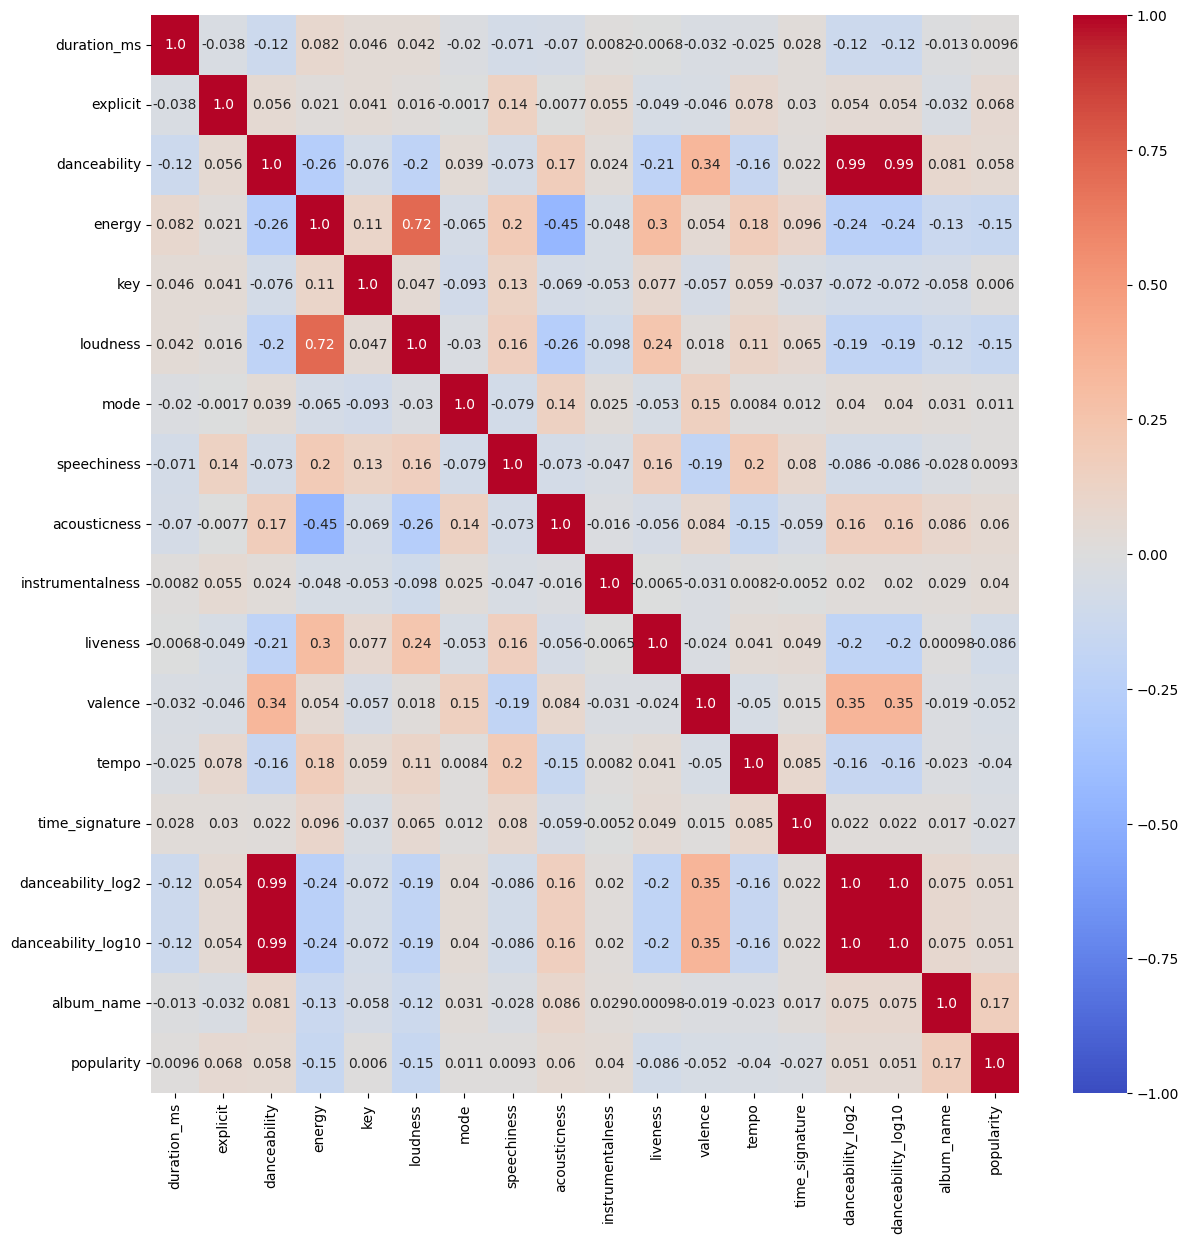

In [16]:
#Heat map
corr = df_norm.corr()
fig, ax = plt.subplots(figsize=(14, 14))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, fmt='.2', cmap= 'coolwarm')

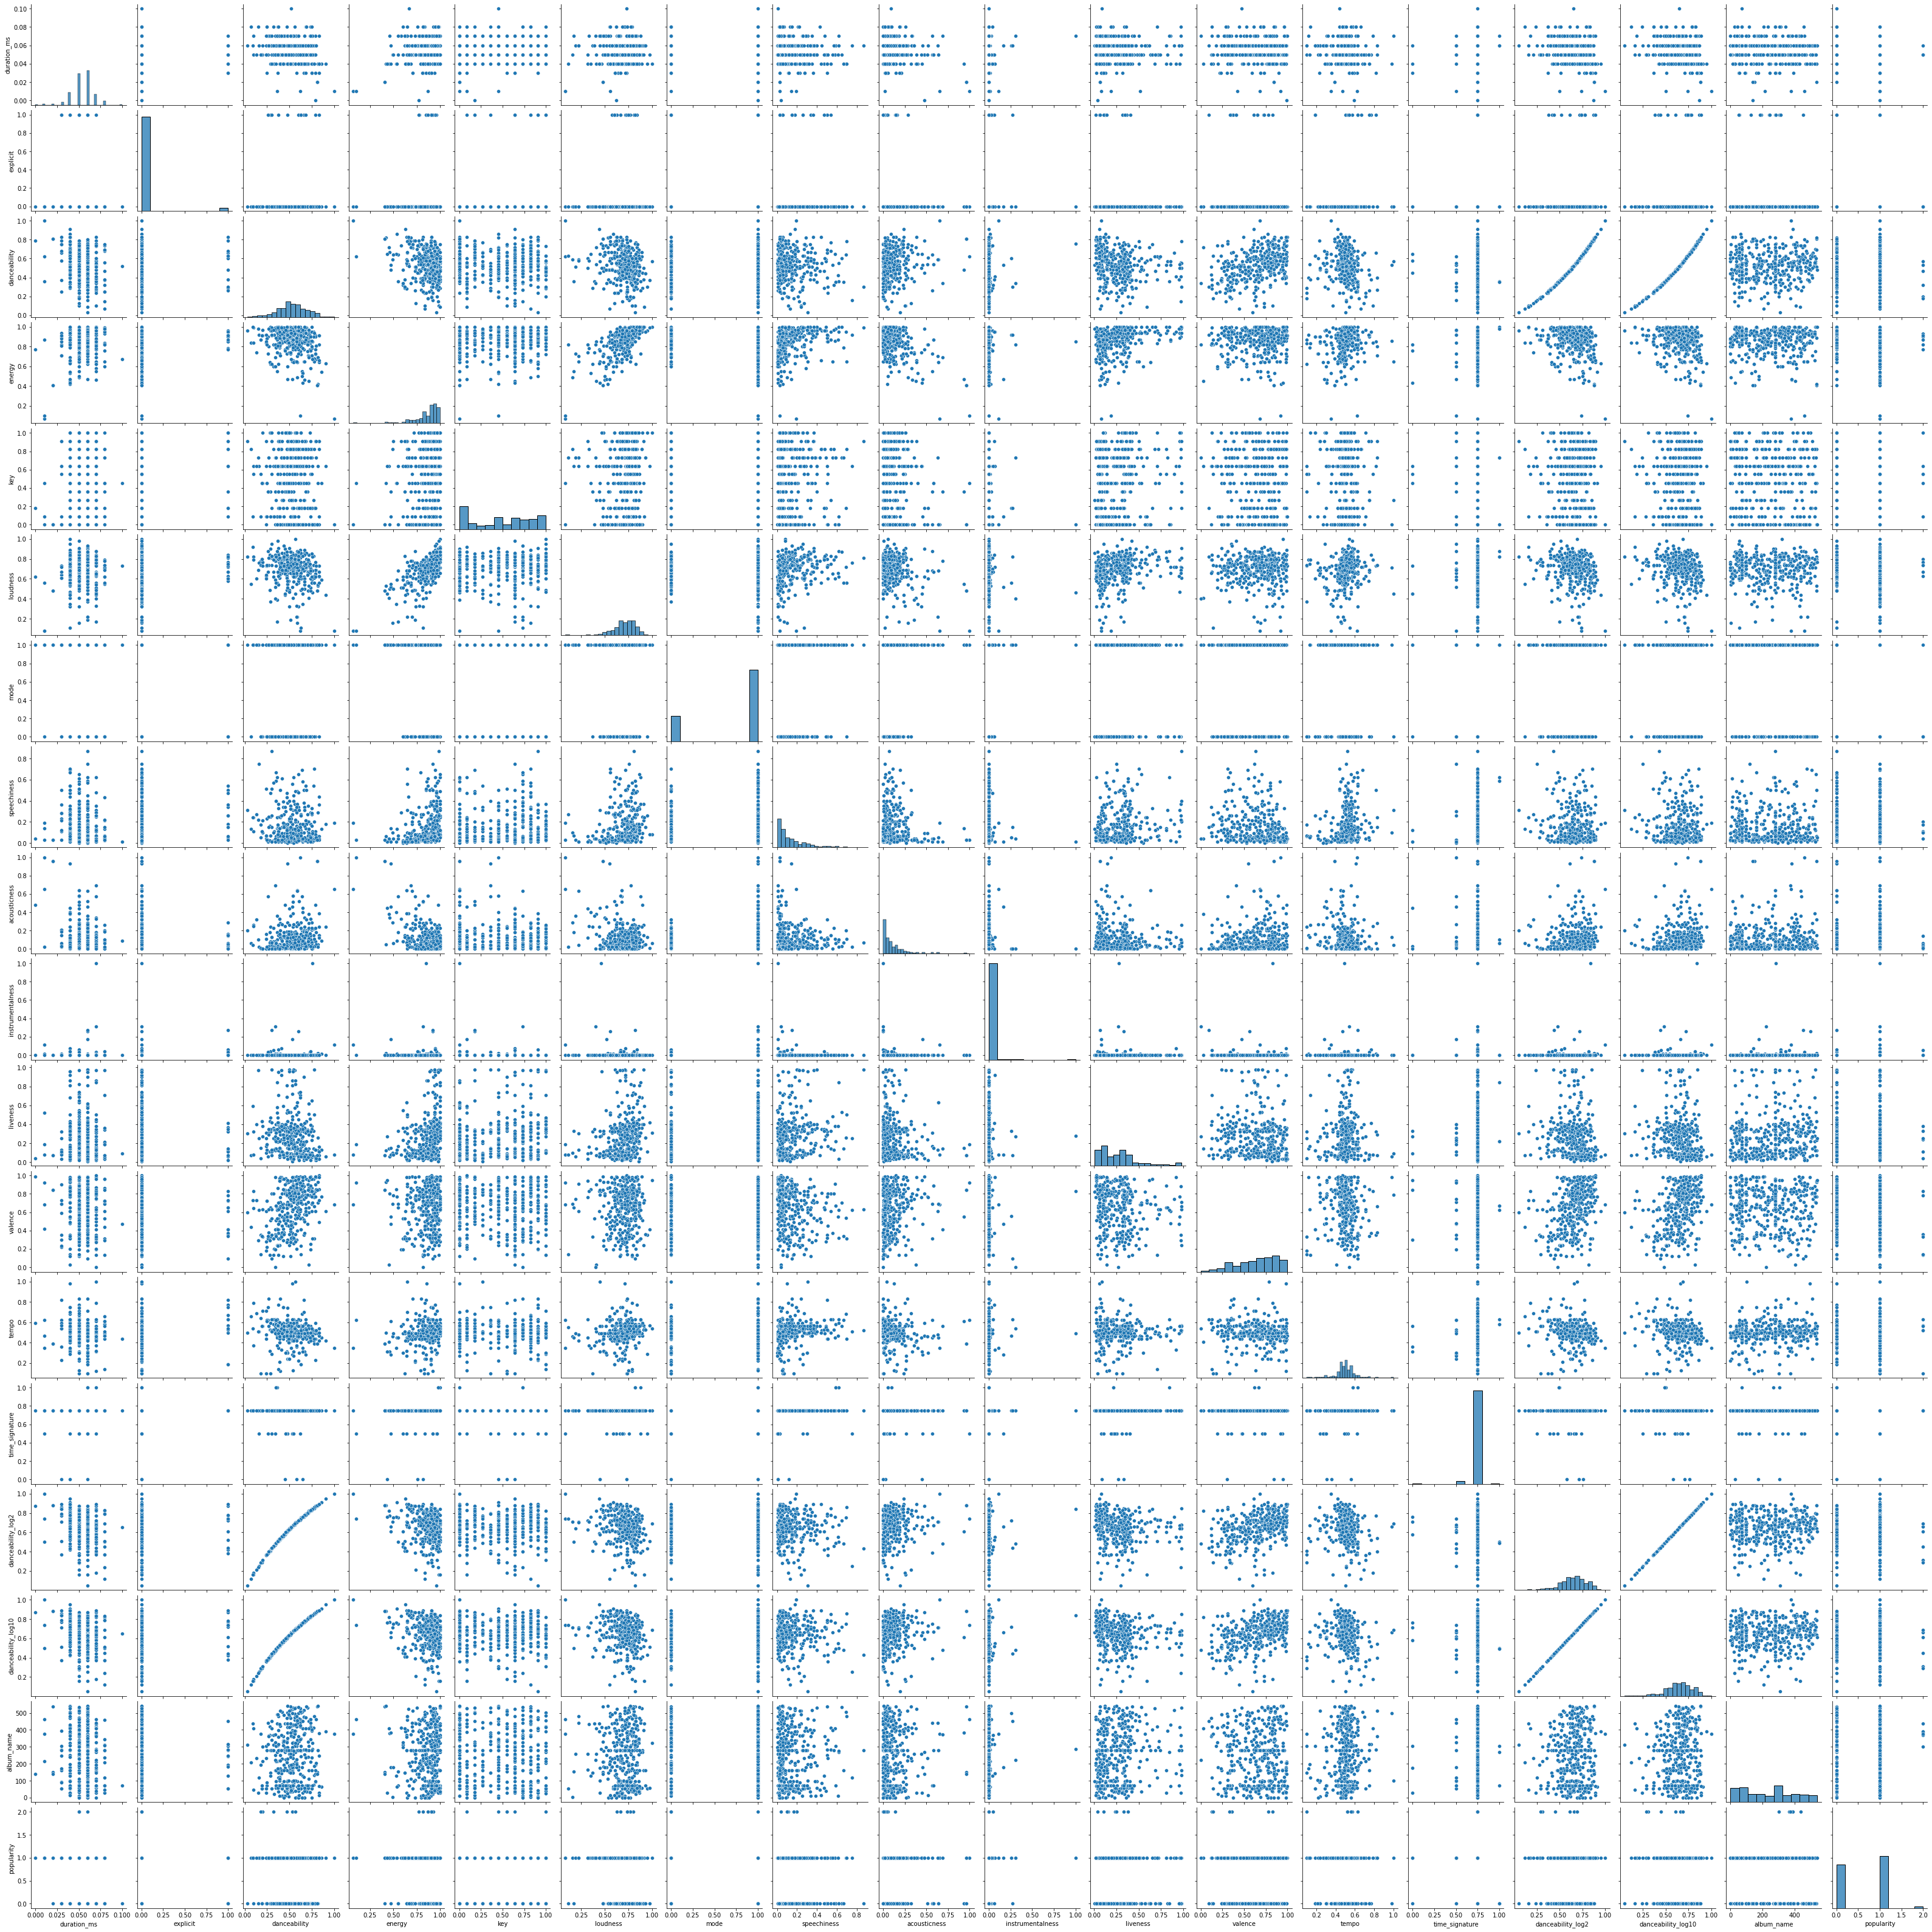

In [ ]:
#Very, very, very, very computationally intensive pair plot
#Run at your own risk
_=sns.pairplot(data=df_norm.sample(n=400).round(2))


In [17]:
#decided to keep the original danceability as taking a log reduced correlation
df_norm = df_norm.drop(columns=['danceability_log2','danceability_log10'])
df_norm

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,popularity
0,0.030470,0.0,0.583587,0.818898,0.545455,0.731331,0.0,0.117823,0.029487,0.000533,0.085860,0.295634,0.363310,0.00,305,0
1,0.048957,0.0,0.528875,0.934758,0.090909,0.803004,1.0,0.105142,0.039030,0.000000,0.242138,0.833352,0.568691,0.75,55,0
2,0.050764,0.0,0.188450,0.912261,0.454545,0.803702,0.0,0.106525,0.001675,0.000000,0.432370,0.340073,0.555899,0.75,70,0
3,0.064604,0.0,0.439210,0.952756,0.727273,0.928537,1.0,0.145953,0.052389,0.000000,0.255433,0.357849,0.527631,0.75,70,0
4,0.069111,0.0,0.481763,0.995501,0.636364,0.790499,1.0,0.105372,0.111805,0.000000,0.152135,0.653372,0.485692,0.75,278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.087964,0.0,0.197568,0.739033,0.727273,0.591827,1.0,0.179156,0.131017,0.000000,0.112248,0.452283,0.632275,0.75,233,0
996,0.057353,0.0,0.680851,0.940382,0.636364,0.736640,1.0,0.022596,0.044246,0.000008,0.317822,0.758916,0.471146,0.75,235,0
997,0.056053,0.0,0.480243,0.492688,0.363636,0.505134,1.0,0.002536,0.444004,0.000000,0.100997,0.402289,0.261922,0.75,113,0
998,0.047210,0.0,0.579027,0.893138,1.000000,0.747887,0.0,0.027899,0.015747,0.000290,0.098952,0.987779,0.590146,0.75,205,0


<AxesSubplot: xlabel='danceability', ylabel='popularity'>

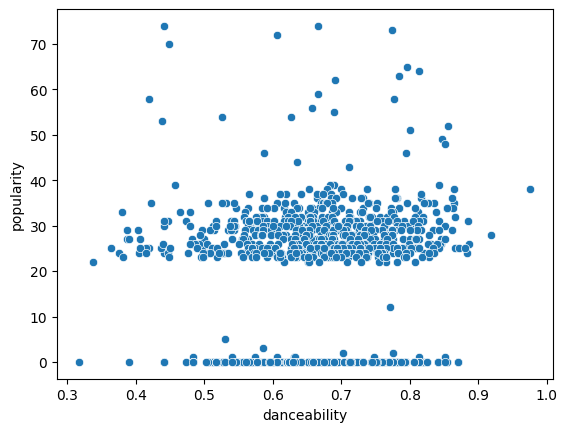

In [18]:
#Single cell of the pairplot
#We only care about correlation with popularity, so we can examine them one by one.
sns.scatterplot(data=df_rem, x='danceability', y='popularity')

In [19]:
#Splitting our dataset
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop(['popularity'], axis=1), df_norm.popularity, test_size=0.2, random_state=21)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(200, 15)
(800, 15)
(200,)
(800,)


In [18]:
#LOGISTIC REGRESSION

#FLAWED: It can only predict 2 outcomes.
#We need a method that can predict 3 outcomes.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
yhat_test = logreg.predict(X_test)
logreg.score(X_test, y_test)

print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.51      0.41      0.46        87
           1       0.59      0.69      0.64       110
           2       0.00      0.00      0.00         3

    accuracy                           0.56       200
   macro avg       0.37      0.37      0.36       200
weighted avg       0.54      0.56      0.55       200



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

In [19]:
#NEURAL NET

#This attempt is flawed because it ends with a sigmoid layer, which can only predict 2 outcomes.
model = Sequential()

model.add(Dense(units=14, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=9, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid', input_dim=X_train.shape[1]))

#Summary of our neural net
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                224       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 9)                 72        
                                                                 
 dense_3 (Dense)             (None, 7)                 70        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 479
Trainable params: 479
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the neural net
#The model is wrong as a wrong optimizer and loss function is used
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#For full batch: We use 0.1 for validation, so full_batch = int(0.9 * X_train.shape[0]).  It must be an int, or we'll get an error.
his = model.fit(X_train.astype('float'), y_train, validation_split=0.1, batch_size=5, epochs=200)

Epoch 1/200
144/144 [==============================] - 2s 3ms/step - loss: 0.9624 - accuracy: 0.5472 - val_loss: 0.6552 - val_accuracy: 0.5250
Epoch 2/200
144/144 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.5472 - val_loss: 0.6579 - val_accuracy: 0.5000
Epoch 3/200
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.5625 - val_loss: 0.6546 - val_accuracy: 0.5500
Epoch 4/200
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.5889 - val_loss: 0.6562 - val_accuracy: 0.5750
Epoch 5/200
144/144 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6278 - val_loss: 0.6517 - val_accuracy: 0.6000
Epoch 6/200
144/144 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.5958 - val_loss: 0.6548 - val_accuracy: 0.5500
Epoch 7/200
144/144 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.5903 - val_loss: 0.6537 - val_accuracy: 0.5375

In [ ]:
#Test accuracy of our neural net
yhat_test = model.predict(X_test.astype(float))

#Threshold our predictions
yhat = []
for y in yhat_test:
    if y <= 0.33:
        yhat.append(0)
    elif y <= 0.67:
        yhat.append(1)
    else:
        yhat.append(2)

7/7 [==============================] - 0s 2ms/step


In [ ]:
print('Model Classification Report:')
print(classification_report(y_test, yhat))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.47      0.64      0.54       110
           2       0.00      0.00      0.00         3

    accuracy                           0.35       200
   macro avg       0.16      0.21      0.18       200
weighted avg       0.26      0.35      0.30       200



In [20]:
#CORRECT MODEL
#Here, we use one-hot encoding and end the neural net with a softmax function.
y_train_single = y_train
one_hot_encoding = pd.get_dummies(y_train)
y_train = one_hot_encoding
display(y_train)

,0,1,2
108,1,0,0
134,0,1,0
585,0,1,0
42,1,0,0
990,1,0,0
...,...,...,...
48,1,0,0
772,0,1,0
824,1,0,0
207,0,1,0


In [ ]:

#CORRECT MODEL
#This model is for trial and error.
#The real model is further down.
model = Sequential()

#We also use "selu" instead of "relu".
#We think "selu" is better in general as it allows for negative values.
model.add(Dense(units=30, activation = 'selu', input_dim = X_train.shape[1]))
model.add(Dense(units=15, activation = 'selu'))
model.add(Dense(units=10, activation = 'selu'))
model.add(Dense(units=5, activation = 'selu'))
model.add(Dense(units=10, activation = 'selu'))
#We end with "softmax" because it can decide among more than 2 outcomes.
model.add(Dense(units = 3, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                480       
                                                                 
 dense_6 (Dense)             (None, 15)                465       
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 10)                60        
                                                                 
 dense_10 (Dense)            (None, 3)                 33        
                                                                 
Total params: 1,253
Trainable params: 1,253
Non-traina

In [ ]:
#We also switched to the correct optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
his = model.fit(X_train.astype('float'), y_train, validation_split=0.1, batch_size=5, epochs=200)

Epoch 1/200
144/144 [==============================] - 1s 4ms/step - loss: 0.8056 - accuracy: 0.5097 - val_loss: 0.7449 - val_accuracy: 0.5500
Epoch 2/200
144/144 [==============================] - 0s 2ms/step - loss: 0.7500 - accuracy: 0.5889 - val_loss: 0.7368 - val_accuracy: 0.5875
Epoch 3/200
144/144 [==============================] - 0s 2ms/step - loss: 0.7447 - accuracy: 0.6125 - val_loss: 0.7354 - val_accuracy: 0.6250
Epoch 4/200
144/144 [==============================] - 0s 2ms/step - loss: 0.7415 - accuracy: 0.6208 - val_loss: 0.7329 - val_accuracy: 0.6000
Epoch 5/200
144/144 [==============================] - 0s 2ms/step - loss: 0.7388 - accuracy: 0.6167 - val_loss: 0.7656 - val_accuracy: 0.5500
Epoch 6/200
144/144 [==============================] - 0s 2ms/step - loss: 0.7377 - accuracy: 0.6194 - val_loss: 0.7336 - val_accuracy: 0.5750
Epoch 7/200
144/144 [==============================] - 0s 2ms/step - loss: 0.7344 - accuracy: 0.6208 - val_loss: 0.7326 - val_accuracy: 0.6000

In [ ]:
yhat_test = model.predict(X_test.astype(float))

yhat = []
for y in yhat_test:
    yhat.append(np.argmax(y))
yhat = np.array(yhat)

print(yhat.shape)

7/7 [==============================] - 0s 2ms/step
(200,)


In [ ]:
print('Model Classification Report:')
print(classification_report(y_test, yhat))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.28      0.40        87
           1       0.61      0.93      0.73       110
           2       0.00      0.00      0.00         3

    accuracy                           0.63       200
   macro avg       0.45      0.40      0.38       200
weighted avg       0.66      0.63      0.58       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


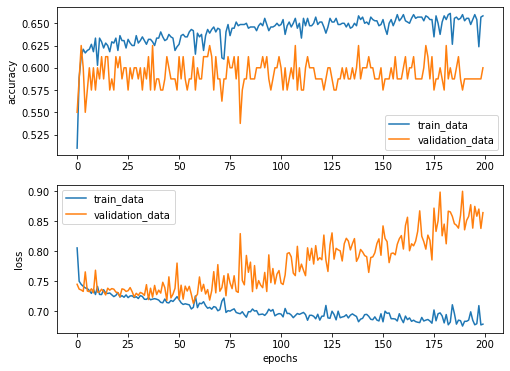

In [ ]:


#Initial plot
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))

#Plot performance over training data
ax1.plot(his.history['accuracy'], label='train_data')
ax2.plot(his.history['loss'], label='train_data')

#Plot performance over validation data
ax1.plot(his.history['val_accuracy'], label='validation_data')
ax2.plot(his.history['val_loss'], label='validation_data')

#Axis Lables
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
#Graph Legends
ax1.legend()
ax2.legend()

In [ ]:
#Best model
#73% ACCURACY
model = Sequential()

model.add(Dense(units=30, activation = 'selu', input_dim = X_train.shape[1]))
model.add(Dense(units=15, activation = 'selu'))
model.add(Dense(units=10, activation = 'selu'))
model.add(Dense(units=10, activation = 'selu'))
model.add(Dense(units=5, activation = 'selu'))

model.add(Dense(units = 3, activation = 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 30)                480       
                                                                 
 dense_36 (Dense)            (None, 15)                465       
                                                                 
 dense_37 (Dense)            (None, 10)                160       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 dense_39 (Dense)            (None, 5)                 55        
                                                                 
 dense_40 (Dense)            (None, 3)                 18        
                                                                 
Total params: 1,288
Trainable params: 1,288
Non-traina

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
his = model.fit(X_train.astype('float'), y_train, validation_split=0.1, batch_size=5, epochs=200)

Epoch 1/200
144/144 [==============================] - 1s 4ms/step - loss: 1.7909 - accuracy: 0.5319 - val_loss: 0.8644 - val_accuracy: 0.7000
Epoch 2/200
144/144 [==============================] - 0s 2ms/step - loss: 1.1376 - accuracy: 0.5486 - val_loss: 1.4057 - val_accuracy: 0.5375
Epoch 3/200
144/144 [==============================] - 0s 2ms/step - loss: 1.0529 - accuracy: 0.5347 - val_loss: 1.0317 - val_accuracy: 0.5500
Epoch 4/200
144/144 [==============================] - 0s 2ms/step - loss: 0.8767 - accuracy: 0.5736 - val_loss: 0.9181 - val_accuracy: 0.5500
Epoch 5/200
144/144 [==============================] - 0s 2ms/step - loss: 0.9214 - accuracy: 0.5125 - val_loss: 0.8039 - val_accuracy: 0.6375
Epoch 6/200
144/144 [==============================] - 0s 2ms/step - loss: 0.7940 - accuracy: 0.5847 - val_loss: 0.7115 - val_accuracy: 0.6500
Epoch 7/200
144/144 [==============================] - 0s 2ms/step - loss: 0.8443 - accuracy: 0.5375 - val_loss: 0.7876 - val_accuracy: 0.5875

In [ ]:
yhat_test = model.predict(X_test.astype(float))

yhat = []
for y in yhat_test:
    yhat.append(np.argmax(y))
yhat = np.array(yhat)

print(yhat.shape)

7/7 [==============================] - 0s 2ms/step
(200,)


In [ ]:
print('Model Classification Report:')
print(classification_report(y_test, yhat))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.55      0.65        87
           1       0.71      0.89      0.79       110
           2       0.00      0.00      0.00         3

    accuracy                           0.73       200
   macro avg       0.50      0.48      0.48       200
weighted avg       0.73      0.73      0.72       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


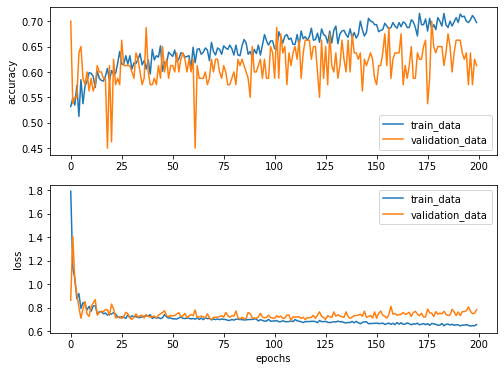

In [ ]:
#Initial plot
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))

#Plot performance over training data
ax1.plot(his.history['accuracy'], label='train_data')
ax2.plot(his.history['loss'], label='train_data')

#Plot performance over validation data
ax1.plot(his.history['val_accuracy'], label='validation_data')
ax2.plot(his.history['val_loss'], label='validation_data')

#Axis Lables
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
#Graph Legends
ax1.legend()
ax2.legend()

In [21]:
#SVM best model
rbf = svm.SVC(kernel='rbf', gamma=2, decision_function_shape='ovo').fit(X_train, y_train_single)
rbf_pred = rbf.predict(X_test)
cm_rbf = classification_report(y_test, rbf_pred)
print(cm_rbf)

#Encode: Currently unused
#encoder = OrdinalEncoder() # Encodes each category as integers from 0 to n_classes-1
#y_encoder = LabelEncoder() # Same functionality but designed for the dependent variable.
#NB = CategoricalNB()

#encoder.fit(X_train)
#y_encoder.fit(y_train)


#test other models

#linear = svm.SVC(kernel='linear', decision_function_shape='ovo').fit(X_train, y_train)
#poly = svm.SVC(kernel='poly', degree=3, decision_function_shape='ovo').fit(X_train, y_train)
#sig = svm.SVC(kernel='sigmoid', decision_function_shape='ovo').fit(X_train, y_train)

#linear_pred = linear.predict(X_test)
#poly_pred = poly.predict(X_test)
#sig_pred = sig.predict(X_test)

#cm_lin = classification_report(y_test, linear_pred)
#cm_poly = classification_report(y_test, poly_pred)
#cm_sig = classification_report(y_test, sig_pred)

#print(cm_lin)
#print(cm_poly)
#print(cm_sig)

              precision    recall  f1-score   support

           0       0.97      0.64      0.77        87
           1       0.76      0.98      0.86       110
           2       0.00      0.00      0.00         3

    accuracy                           0.82       200
   macro avg       0.58      0.54      0.54       200
weighted avg       0.84      0.82      0.81       200



C:\Users\cenny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cenny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cenny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

       energy  loudness
0    0.818898  0.731331
1    0.934758  0.803004
2    0.912261  0.803702
3    0.952756  0.928537
4    0.995501  0.790499
..        ...       ...
995  0.739033  0.591827
996  0.940382  0.736640
997  0.492688  0.505134
998  0.893138  0.747887
999  0.865017  0.690744

[1000 rows x 2 columns]


C:\Users\cenny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot: xlabel='energy', ylabel='loudness'>

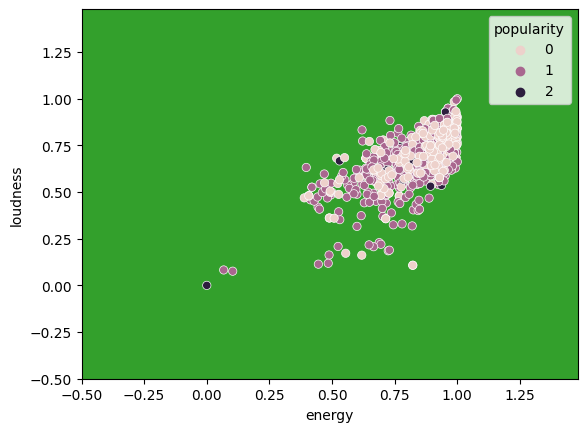

In [22]:
#graph 
#energy vs loudness
df_energy_loudness = df_norm[['energy', 'loudness']]
print(df_energy_loudness)
y = df_norm.popularity
X_train, X_test, y_train, y_test = train_test_split(df_energy_loudness, y, test_size = 0.30)

#rbf
svmpoly = SVC(kernel='rbf', gamma=1, decision_function_shape='ovo')
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)

#graph
meshstep = .02
plotx_min, plotx_max = df_energy_loudness['energy'].min()-0.5, df_energy_loudness['energy'].max()+0.5
ploty_min, ploty_max = df_energy_loudness['loudness'].min()-0.5, df_energy_loudness['loudness'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svmpoly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = df_energy_loudness, x = 'energy', y = 'loudness', hue = y)